In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import glob
import os
from pathlib import Path  
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib as matplotlib
import hashlib

## Data Import & Cleaning

In [6]:
df = pd.concat(map(pd.read_csv, glob.glob(
    os.path.join('/Users/cerenyikilmaz/Desktop/RFM_Analyse/dataset', "*2021.csv"))))

In [7]:
df.head()

,customer_id,item_id,item_name,unit_price,item_count,purchase_time
0,6359890.0,386012549,"Mekoraf 2,5 Metre Çelik Raf Profil 40x40 1,5 m...",105.90,1,2021-12-31 23:59:03
1,14996678.0,474835415,Intel Core i9-10980XE Extreme Edition 3 GHz LG...,17250.00,1,2021-12-31 23:58:57
2,11479470.0,505465829,7 Cm Yükseklikte Aralıklı Tahtalardan Yüksek M...,10.22,1,2021-12-31 23:58:25
3,8478960.0,520605618,Riddex Elektronik Fare ve Haşere Kovucu Cihaz,34.99,1,2021-12-31 23:58:13
4,27426979.0,504242650,Razer Gold 25 TL,25.00,1,2021-12-31 23:57:12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16105820 entries, 0 to 1678921
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   customer_id    float64
 1   item_id        int64  
 2   item_name      object 
 3   unit_price     float64
 4   item_count     int64  
 5   purchase_time  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 860.1+ MB


In [9]:
df.shape

(16105820, 6)

In [10]:
df.isnull().sum()

customer_id      406530
item_id               0
item_name             2
unit_price            0
item_count            0
purchase_time         0
dtype: int64

In [11]:
# dropping null values
df = df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

In [12]:
# data-type changes
df["customer_id"] = df["customer_id"].astype('str')
df["item_id"] = df["item_id"].astype('str')
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15699288 entries, 0 to 1678921
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   customer_id    object        
 1   item_id        object        
 2   item_name      object        
 3   unit_price     float64       
 4   item_count     int64         
 5   purchase_time  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 838.4+ MB


In [14]:
# I'm deleting the .0's in customer_id
df['customer_id']=df['customer_id'].str[:-2]

In [15]:
df.head()

,customer_id,item_id,item_name,unit_price,item_count,purchase_time
0,6359890,386012549,"Mekoraf 2,5 Metre Çelik Raf Profil 40x40 1,5 m...",105.90,1,2021-12-31 23:59:03
1,14996678,474835415,Intel Core i9-10980XE Extreme Edition 3 GHz LG...,17250.00,1,2021-12-31 23:58:57
2,11479470,505465829,7 Cm Yükseklikte Aralıklı Tahtalardan Yüksek M...,10.22,1,2021-12-31 23:58:25
3,8478960,520605618,Riddex Elektronik Fare ve Haşere Kovucu Cihaz,34.99,1,2021-12-31 23:58:13
4,27426979,504242650,Razer Gold 25 TL,25.00,1,2021-12-31 23:57:12


In [16]:
df.shape

(15699288, 6)

In [17]:
# dropping price value later than 0
index_names = df[ df['unit_price'] <= 0 ].index
df.drop(index_names, inplace = True)

In [18]:
# While examining the dataset, we see that there are too many products named “Uçak Bileti”, 
# but we see that these products contain illogical values in terms of unit_price. 
# For this reason, we clear the "Uçak Bileti" products from the data set to avoid data inconsistency.
index_names = df[ df['item_name'] == "Uçak Bileti" ].index
df.drop(index_names, inplace = True)

## Data Preparation & Descriptive Statistics 

In [19]:
df.shape

(15568066, 6)

In [20]:
df["customer_id"].nunique()

2838497

In [21]:
df["item_id"].nunique()

3635505

In [22]:
df["item_id"].count()

15568066

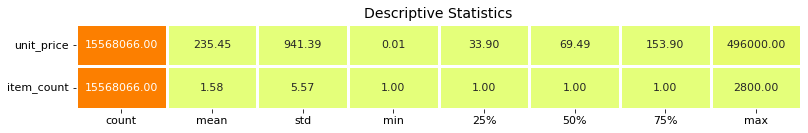

In [23]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= desc.columns,
                           data= desc)
    
    f,ax = plt.subplots(figsize=(13,
                                 desc_df.shape[0]*0.78))
    sns.heatmap(desc_df,
                annot=True,
                cmap = "Wistia",
                fmt= '.2f',
                ax=ax,
                linecolor='white',
                linewidths = 1.3,
                cbar = False,
                annot_kws={"size": 11})
    plt.xticks(size = 11)
    plt.yticks(size = 11,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df[[col for col in df.columns if (df[col].dtype == 'int' or df[col].dtype == 'float') ]])

In [24]:
df["item_name"].value_counts()

Xiaomi Mi TV Stick Android TV Medya Oynatıcı                                14351
Enjoy Cat Food Tavuklu Yetişkin Kedi Maması 15 KG                           13147
Apple iPhone 11 64 GB (Apple Türkiye Garantili)                             11543
Xiaomi Mi Wifi Pro Türkiye Versiyon 300 Mbps 2.4 Ghz Sinyal Güçlendirici    10606
Artdeco Akrilik Boya 140 ml Renk Seçmeli Canlı ve Pastel                     9500
                                                                            ...  
RED APPLE SULU BOYA FIRÇASI NO:5                                                1
BRONS SULU BOYA FIRÇA NO 00                                                     1
Metal Çeki Demiri 1/10                                                          1
Mikro Renkli Simli Yapıştırıcı 6 lı Gg-1242                                     1
Keskin Color A5 Haftalık Ajanda - Pond Lily                                     1
Name: item_name, Length: 3190323, dtype: int64

In [25]:
# Most purchased 5 items
df.groupby("item_name").agg({"item_count":"sum"}).sort_values("item_count", ascending=False).head(5)

,item_count
item_name,
Damlama Sulama Kurtağızlı Tüm Ek Parçalar 16mm-20mm Damlama Set,51011
Demaks Mat Siyah Lüks Mobilya Dolap Çekmece Kulpları -Tüm Ölçüler,29109
DAMLAMA SULAMA YEŞİL DAMLATICI DEBİ AYARLI MEME,21625
DAMLAMA SULAMA KIRMIZI DAMLATICI DEBİ AYARLI MEME,21069
DAMLAMA SULAMA EK PARÇALAR (16mm.-20mm.),19747


In [26]:
# Least purchased 5 items
df.groupby("item_name").agg({"item_count":"sum"}).sort_values("item_count", ascending=False).tail(5)

,item_count
item_name,
Kahramanların Görevi/Morgan Rice,1
Kahramanlar Çelik Yağmur Orta Boy Çelik Çaydanlık Kırmızı,1
Kahramanlar Çelik Yağmur Mega Boy Çaydanlık Takımı,1
Kahramanlar Çelik Sırma 20x6 cm Kısa Tencere,1
🧿 Metal Sibop Kapağı // Anahtarlık Hediyeli // Logolu,1


In [27]:
# I use the customer_id and purchase_time variables for this. 
# If there are values for a customer_id with exactly the same purchase_time, 
# the invoice number generated for them will be the same because they were purchased in the same cart.
df = df.copy()
key_combination = ['customer_id', 'purchase_time']
df['invoice_number'] = list(map(lambda x: hashlib.sha1('-'.join([str(col_value) for col_value in x])
                                                      .encode('utf-8')).hexdigest(), df[key_combination].values))

In [28]:
df.head(10)

,customer_id,item_id,item_name,unit_price,item_count,purchase_time,invoice_number
0,6359890,386012549,"Mekoraf 2,5 Metre Çelik Raf Profil 40x40 1,5 m...",105.90,1,2021-12-31 23:59:03,8ee5aa0bf0fb31da5c72025b259fff1883a3ffe0
1,14996678,474835415,Intel Core i9-10980XE Extreme Edition 3 GHz LG...,17250.00,1,2021-12-31 23:58:57,b65e6fb1c36ef1bf3aa26874927c2677627d236a
2,11479470,505465829,7 Cm Yükseklikte Aralıklı Tahtalardan Yüksek M...,10.22,1,2021-12-31 23:58:25,d04b373e7d157188f8200350d77f54d6b9dc4f5c
3,8478960,520605618,Riddex Elektronik Fare ve Haşere Kovucu Cihaz,34.99,1,2021-12-31 23:58:13,7d8efca99333b32f09d95f0c4e45b1bb920fb220
4,27426979,504242650,Razer Gold 25 TL,25.00,1,2021-12-31 23:57:12,a71f62a5f8a8407fedb8da3145408c47c6874cc1
5,15474141,231406130,2 ADET KALİTELİ JAK DÖNÜŞTÜRÜCÜ-İNCE UCU KALIN...,66.75,1,2021-12-31 23:57:03,d8c69ed81b7faf89f86f77903e89507502e39054
6,15474141,521060643,Philips TAH4105BK/00 Mikrofonlu Kulak Üstü Kul...,319.00,1,2021-12-31 23:57:03,d8c69ed81b7faf89f86f77903e89507502e39054
7,17893403,476325353,"Mavi Alpaka Bay Önlük-Öğrenci , Öğretmen,Mesle...",145.00,1,2021-12-31 23:56:58,ae7341cd0afe5c597831e3fb7dabb509d27ad7ff
8,17893403,397094212,Kars Bakkaliyesi Eski Kaşar 950 G,227.98,2,2021-12-31 23:56:58,ae7341cd0afe5c597831e3fb7dabb509d27ad7ff
9,17893403,446224641,Sanbe 132 S 4906 Platin Kız Çocuk İçi Kürklü Bot,194.00,1,2021-12-31 23:56:58,ae7341cd0afe5c597831e3fb7dabb509d27ad7ff


In [29]:
# Unique transaction count
df["invoice_number"].nunique()

10958403

In [30]:
# How much money was spent per transaction
# I'm using the item_count and unit_price variables in my dataset to find this out.
df["total_price"] = df["item_count"] * df["unit_price"]

In [31]:
df.groupby("invoice_number").agg({"total_price":"sum"}).sort_values("total_price", ascending = False).head(5)

,total_price
invoice_number,
2cc11788d9b777380f47f6a835a01670eddb9b37,11800915.55
aa1def46326573f96c8c8771daa1d9cc06b48d7f,8249375.00
b158901b0a6d46e2734a8d4b0c5877fa6b545f2e,7457741.22
f62ab70ad78f747c69db12146dea5aa885df9aca,7130800.00
b887b2031b7922e17ea3f43404d36bc49e2b7c9a,5661000.00


In [32]:
df.groupby("item_name").agg({"unit_price":"max"}).sort_values("unit_price", ascending = False).head(5) 

,unit_price
item_name,
PNY NVIDIA Quadro RTX 8000 VCQRTX8000-PB 48 GB 384 Bit GDDR6 Ekran Kartı,496000.00
24 Ayar 100 Gram Külçe Altın,465604.56
24 Ayar 50 Gram Külçe Altın,272550.48
50 Gram Külçe Altın 24 Ayar,260749.10
100 Gram Külçe Altın 24 Ayar,260491.35


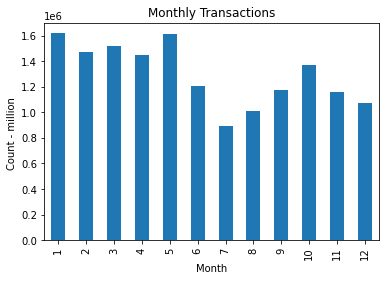

In [33]:
# Monthly transactions
order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 ]
df[df.purchase_time.dt.year==2021].purchase_time.dt.month.value_counts(sort=False).loc[order].plot(kind='bar');
plt.title("Monthly Transactions")
plt.xlabel("Month")
plt.ylabel("Count - million ")
plt.rcParams["figure.figsize"] = [17, 12]

In [34]:
# Oldest and latest purchase time
print(f'Oldest Date: {df.purchase_time.min()}\n')
print(f'Latest Date: {df.purchase_time.max()}')

Oldest Date: 2021-01-01 00:00:11

Latest Date: 2021-12-31 23:59:03


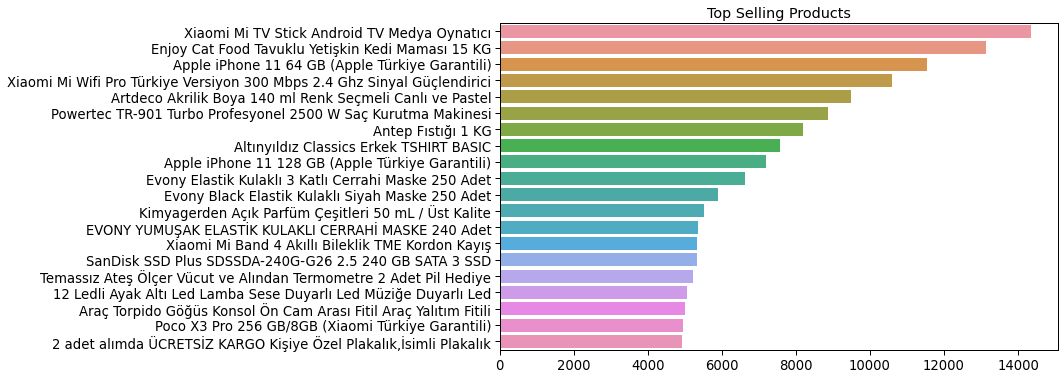

In [35]:
# Top selling items
top_products = df['item_name'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top Selling Products")
plt.show();

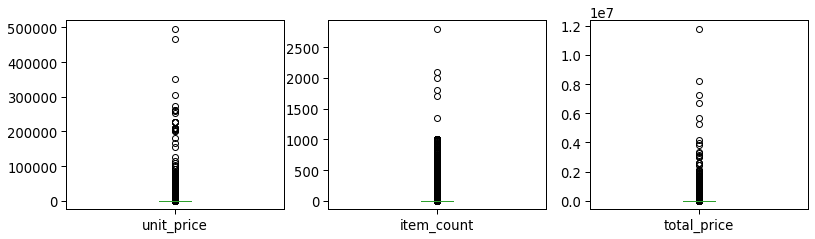

In [36]:
# Distribution of values
plt.rcParams['figure.figsize'] = [18, 16]
df.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

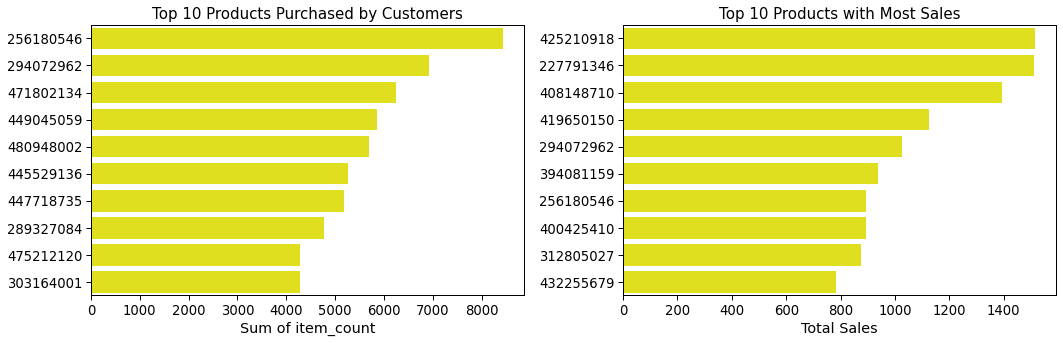

In [37]:
column = ['invoice_number','total_price']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = df[df['total_price']>= 0.1].groupby('item_id')[j]
                .nunique().sort_values(ascending=False).head(10).values,
                y = df[df['total_price']>= 0.1].groupby('item_id')[j]
                .nunique().sort_values(ascending=False).head(10).index,
                color='yellow')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of item_count')
        plt.title('Top 10 Products Purchased by Customers',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 Products with Most Sales',size=15)
    
plt.tight_layout()
plt.show()

## Customer Profile

In [39]:
customers = pd.read_csv('/Users/cerenyikilmaz/Desktop/RFM_Analyse/dataset/users.csv')
customers.head(10)
# 0:Male, 1:Female, 2:Not Specified

,customer_id,gender,birth_date,platform
0,6708110,1,1997-07-07 00:00:00,iOS
1,7568499,0,1995-06-01 00:00:00,iOS
2,8612475,0,1985-05-20 00:00:00,iOS
3,9149112,0,1993-02-02 00:00:00,iOS
4,9051080,1,1995-08-08 00:00:00,iOS
5,2286982,0,1995-06-17 00:00:00,iOS
6,7769464,0,1995-08-29 00:00:00,iOS
7,8695839,0,1996-08-15 16:02:12,iOS
8,4469603,0,1988-04-02 15:35:31,Android
9,8339626,0,1993-07-18 09:42:57,Android


In [40]:
customers.info()
customers.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042094 entries, 0 to 2042093
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   customer_id  int64 
 1   gender       int64 
 2   birth_date   object
 3   platform     object
dtypes: int64(2), object(2)
memory usage: 62.3+ MB


customer_id    0
gender         0
birth_date     0
platform       0
dtype: int64

In [41]:
# data-types changes
customers['birth_date'] = pd.to_datetime(customers['birth_date'])
customers["customer_id"] = customers["customer_id"].astype('str')

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042094 entries, 0 to 2042093
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   customer_id  object        
 1   gender       int64         
 2   birth_date   datetime64[ns]
 3   platform     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 62.3+ MB


In [42]:
# I calculate the age of the customers with the birthdate variable based on today's date
customers["birth_date"] = pd.to_datetime(customers["birth_date"])
customers["age"] = customers["birth_date"].apply(lambda x : (pd.datetime.now().year - x.year))

/var/folders/4n/h661rptn1ml8y5mzlyrwsqqh0000gn/T/ipykernel_5979/2435019627.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  customers["age"] = customers["birth_date"].apply(lambda x : (pd.datetime.now().year - x.year))


In [43]:
customers.head()

,customer_id,gender,birth_date,platform,age
0,6708110,1,1997-07-07,iOS,25
1,7568499,0,1995-06-01,iOS,27
2,8612475,0,1985-05-20,iOS,37
3,9149112,0,1993-02-02,iOS,29
4,9051080,1,1995-08-08,iOS,27


In [44]:
customers.shape

(2042094, 5)

/Users/cerenyikilmaz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age\n'}, xlabel='age', ylabel='Density'>

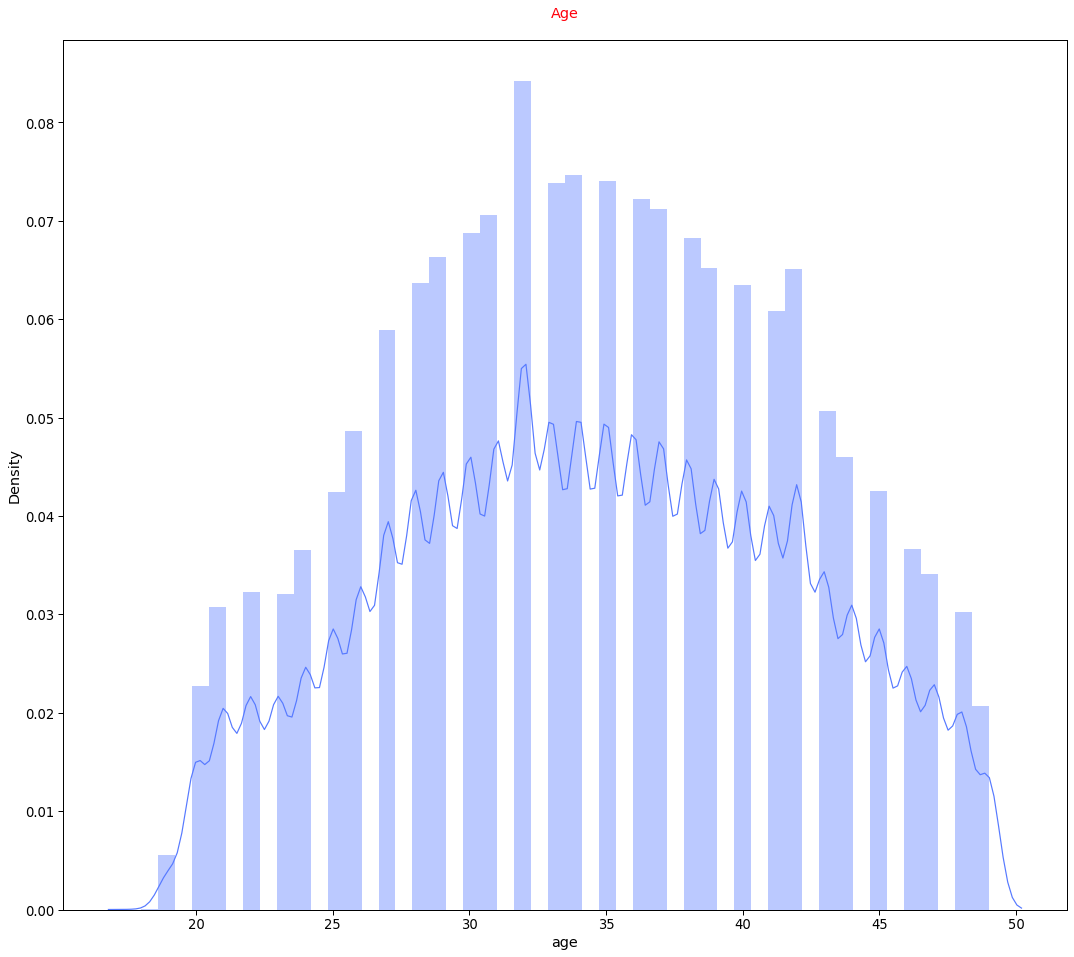

In [45]:
# Age distribution
plt.subplot(1,1,1)
plt.title('Age\n', color='#FF000B')
sns.distplot(customers['age'], color='#577AFF')

(0.0, 1500000.0)

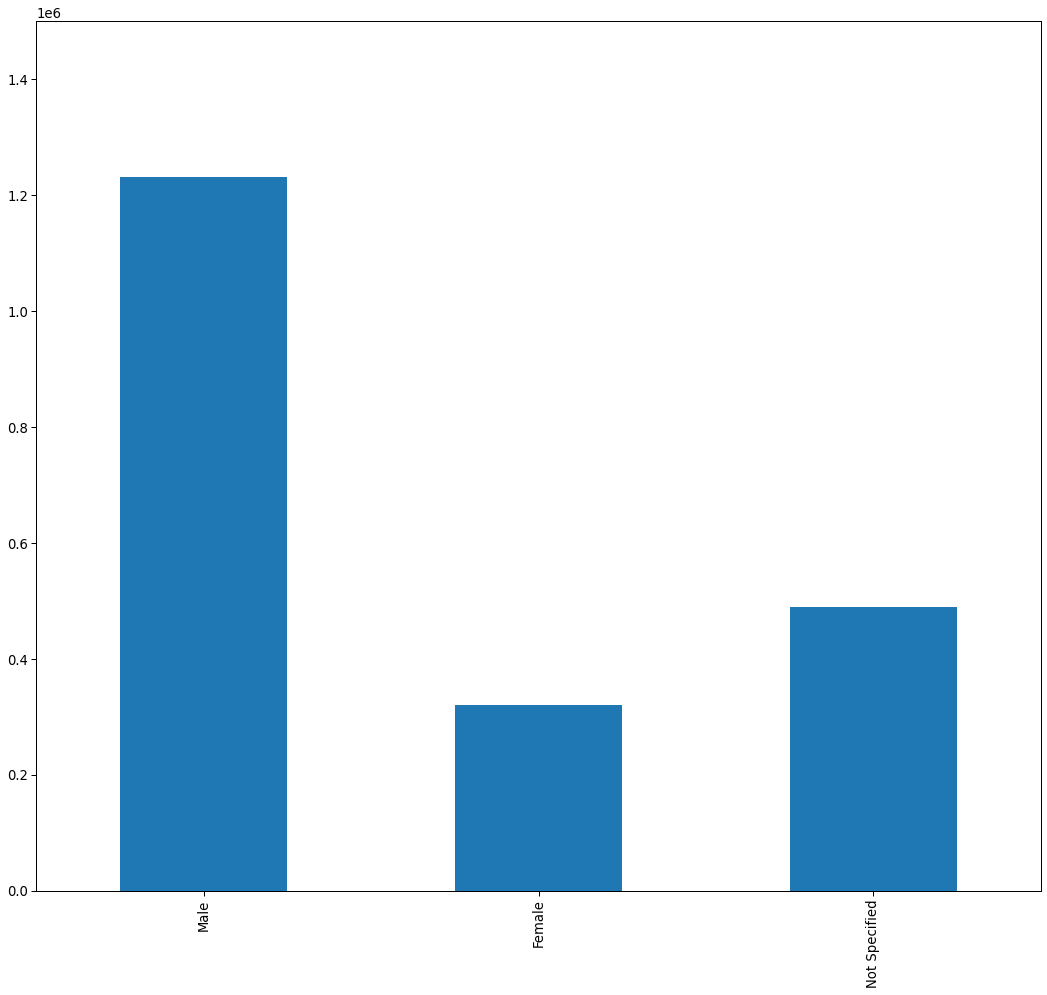

In [46]:
# gender distribution
order = [0, 1, 2]
bars = ('Male', 'Female', 'Not Specified')
x_pos = np.arange(len(bars))

customers["gender"].value_counts(sort=False).loc[order].plot(kind='bar');
plt.rcParams["figure.figsize"] = [7, 7]
plt.xticks(x_pos, bars)
plt.ylim(0, 1500000)

<AxesSubplot:xlabel='gender', ylabel='age'>

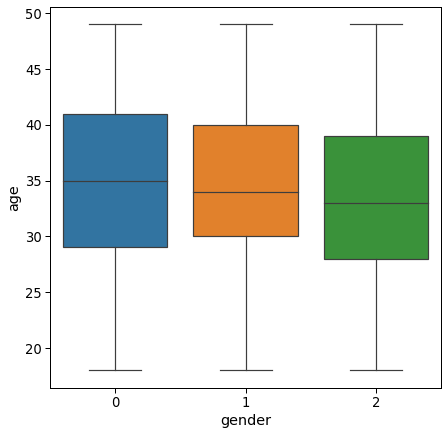

In [47]:
# age and gender distribution
sns.boxplot(x="gender", y="age", data=customers)

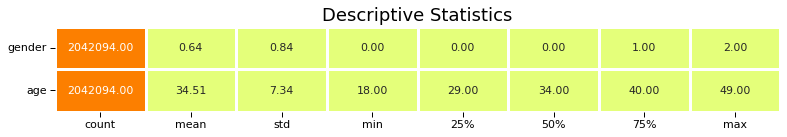

In [48]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= desc.columns,
                           data= desc)
    
    f,ax = plt.subplots(figsize=(13,
                                 desc_df.shape[0]*0.78))
    sns.heatmap(desc_df,
                annot=True,
                cmap = "Wistia",
                fmt= '.2f',
                ax=ax,
                linecolor='white',
                linewidths = 1.3,
                cbar = False,
                annot_kws={"size": 11})
    plt.xticks(size = 11)
    plt.yticks(size = 11,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 18)
    plt.show()
    
desc_stats(customers[[col for col in customers.columns if (customers[col]
                                                           .dtype == 'int' or customers[col].dtype == 'float') ]])

## COHORT Analyse

In [49]:
# I create a new column in my dataset by subtracting the timestamp from purchase_time
df['purchase_date'] = pd.DatetimeIndex(df['purchase_time']).date

In [50]:
df_cohort = df.copy()

# I'm using a function that takes the year and month from the given date and defines the day as 1.

def get_month(x): return dt.datetime(x.year, x.month, 1)

# With this function, I convert the days in purchase_date to 1 and create a column named invoice_month, 
# the column that will help us to use the month information of the invoice.

df_cohort['invoice_month'] = df_cohort['purchase_date'].apply(get_month)

# I also create a variable named cohort_month by grouping the invoice_month and customer_id variables, 
# this gives the first date of purchase for each customer.

grouping = df_cohort.groupby('customer_id')['invoice_month']
df_cohort['cohort_month'] = grouping.transform('min')

df_cohort.head()

,customer_id,item_id,item_name,unit_price,item_count,purchase_time,invoice_number,total_price,purchase_date,invoice_month,cohort_month
0,6359890,386012549,"Mekoraf 2,5 Metre Çelik Raf Profil 40x40 1,5 m...",105.90,1,2021-12-31 23:59:03,8ee5aa0bf0fb31da5c72025b259fff1883a3ffe0,105.90,2021-12-31,2021-12-01,2021-01-01
1,14996678,474835415,Intel Core i9-10980XE Extreme Edition 3 GHz LG...,17250.00,1,2021-12-31 23:58:57,b65e6fb1c36ef1bf3aa26874927c2677627d236a,17250.00,2021-12-31,2021-12-01,2021-01-01
2,11479470,505465829,7 Cm Yükseklikte Aralıklı Tahtalardan Yüksek M...,10.22,1,2021-12-31 23:58:25,d04b373e7d157188f8200350d77f54d6b9dc4f5c,10.22,2021-12-31,2021-12-01,2021-05-01
3,8478960,520605618,Riddex Elektronik Fare ve Haşere Kovucu Cihaz,34.99,1,2021-12-31 23:58:13,7d8efca99333b32f09d95f0c4e45b1bb920fb220,34.99,2021-12-31,2021-12-01,2021-01-01
4,27426979,504242650,Razer Gold 25 TL,25.00,1,2021-12-31 23:57:12,a71f62a5f8a8407fedb8da3145408c47c6874cc1,25.00,2021-12-31,2021-12-01,2021-12-01


In [51]:
df_cohort.info()
df_cohort['purchase_date'] = pd.to_datetime(df_cohort['purchase_date'])
df_cohort['cohort_month'] = pd.to_datetime(df_cohort['cohort_month'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15568066 entries, 0 to 1678921
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     object        
 1   item_id         object        
 2   item_name       object        
 3   unit_price      float64       
 4   item_count      int64         
 5   purchase_time   datetime64[ns]
 6   invoice_number  object        
 7   total_price     float64       
 8   purchase_date   object        
 9   invoice_month   datetime64[ns]
 10  cohort_month    datetime64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(5)
memory usage: 1.4+ GB


In [52]:
# With the help of a function, I pull the day, month and year values 
# from the invoice_month and cohort_month variables.

def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [53]:
# I create the cohort_index column for each user, to create it I do the following:

invoice_year, invoice_month, invoice_day = get_date_int(df_cohort, 'invoice_month')
cohort_year, cohort_month, cohort_day = get_date_int(df_cohort, 'cohort_month')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df_cohort['cohort_index'] = years_diff * 12 + months_diff + 1

df_cohort.head(5)

,customer_id,item_id,item_name,unit_price,item_count,purchase_time,invoice_number,total_price,purchase_date,invoice_month,cohort_month,cohort_index
0,6359890,386012549,"Mekoraf 2,5 Metre Çelik Raf Profil 40x40 1,5 m...",105.90,1,2021-12-31 23:59:03,8ee5aa0bf0fb31da5c72025b259fff1883a3ffe0,105.90,2021-12-31,2021-12-01,2021-01-01,12
1,14996678,474835415,Intel Core i9-10980XE Extreme Edition 3 GHz LG...,17250.00,1,2021-12-31 23:58:57,b65e6fb1c36ef1bf3aa26874927c2677627d236a,17250.00,2021-12-31,2021-12-01,2021-01-01,12
2,11479470,505465829,7 Cm Yükseklikte Aralıklı Tahtalardan Yüksek M...,10.22,1,2021-12-31 23:58:25,d04b373e7d157188f8200350d77f54d6b9dc4f5c,10.22,2021-12-31,2021-12-01,2021-05-01,8
3,8478960,520605618,Riddex Elektronik Fare ve Haşere Kovucu Cihaz,34.99,1,2021-12-31 23:58:13,7d8efca99333b32f09d95f0c4e45b1bb920fb220,34.99,2021-12-31,2021-12-01,2021-01-01,12
4,27426979,504242650,Razer Gold 25 TL,25.00,1,2021-12-31 23:57:12,a71f62a5f8a8407fedb8da3145408c47c6874cc1,25.00,2021-12-31,2021-12-01,2021-12-01,1


In [54]:
grouping = df_cohort.groupby(['cohort_month', 'cohort_index'])

cohort_data = grouping['customer_id'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='cohort_month',
                                 columns='cohort_index',
                                 values='customer_id')

In [55]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date

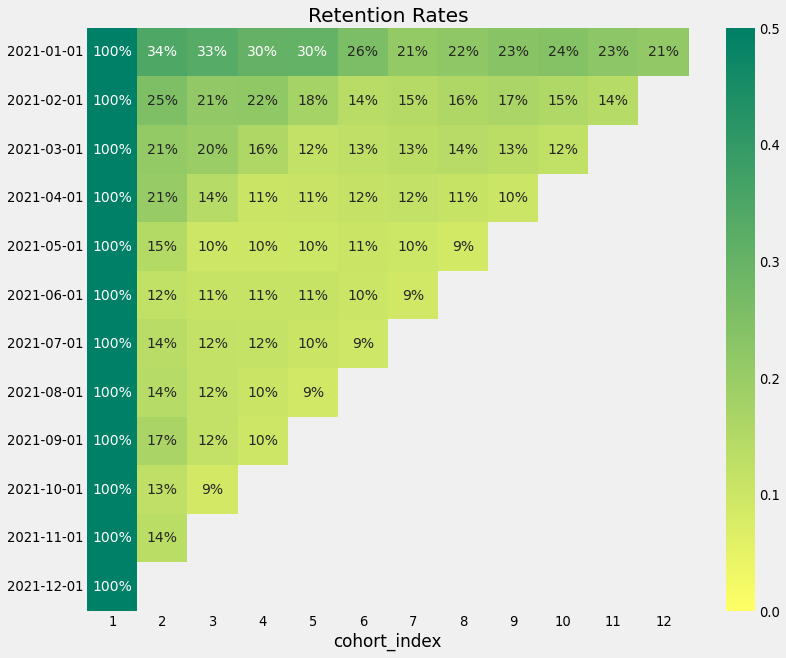

In [56]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='summer_r')
plt.show()

## RFM Analyse

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15568066 entries, 0 to 1678921
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     object        
 1   item_id         object        
 2   item_name       object        
 3   unit_price      float64       
 4   item_count      int64         
 5   purchase_time   datetime64[ns]
 6   invoice_number  object        
 7   total_price     float64       
 8   purchase_date   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.2+ GB


In [58]:
df.head()

,customer_id,item_id,item_name,unit_price,item_count,purchase_time,invoice_number,total_price,purchase_date
0,6359890,386012549,"Mekoraf 2,5 Metre Çelik Raf Profil 40x40 1,5 m...",105.90,1,2021-12-31 23:59:03,8ee5aa0bf0fb31da5c72025b259fff1883a3ffe0,105.90,2021-12-31
1,14996678,474835415,Intel Core i9-10980XE Extreme Edition 3 GHz LG...,17250.00,1,2021-12-31 23:58:57,b65e6fb1c36ef1bf3aa26874927c2677627d236a,17250.00,2021-12-31
2,11479470,505465829,7 Cm Yükseklikte Aralıklı Tahtalardan Yüksek M...,10.22,1,2021-12-31 23:58:25,d04b373e7d157188f8200350d77f54d6b9dc4f5c,10.22,2021-12-31
3,8478960,520605618,Riddex Elektronik Fare ve Haşere Kovucu Cihaz,34.99,1,2021-12-31 23:58:13,7d8efca99333b32f09d95f0c4e45b1bb920fb220,34.99,2021-12-31
4,27426979,504242650,Razer Gold 25 TL,25.00,1,2021-12-31 23:57:12,a71f62a5f8a8407fedb8da3145408c47c6874cc1,25.00,2021-12-31


In [59]:
# We find the first day of shopping.

df["purchase_time"].min()

Timestamp('2021-01-01 00:00:11')

In [60]:
# We find the last day of shopping.

df["purchase_time"].max()

Timestamp('2021-12-31 23:59:03')

In [61]:
now = dt.date(2022,1,1)
print(now)

2022-01-01


## Recency

In [62]:
# We find the day customers last shopped

recency_df = df.groupby(by='customer_id', as_index=False)['purchase_date'].max()
recency_df.columns = ['customer_id','last_purchase_date']
recency_df.head()

,customer_id,last_purchase_date
0,10000000,2021-12-09
1,10000001,2021-07-01
2,10000021,2021-12-27
3,10000038,2021-02-07
4,10000043,2021-10-30


In [63]:
# Calculating Recency

recency_df['recency'] = recency_df['last_purchase_date'].apply(lambda x: (now - x).days)

In [64]:
#I'm dropping LastPurchaseDate because we don't need it anymore.

recency_df.drop('last_purchase_date',axis=1,inplace=True)

In [65]:
recency_df.head(5)

,customer_id,recency
0,10000000,23
1,10000001,184
2,10000021,5
3,10000038,328
4,10000043,63


## Frequency

In [66]:
# I want to determine the total number of purchases a customer has made
# In this way, I can reach the total number of purchases

df_copy = df

# Calculating Frequency

frequency_df = df_copy.groupby(by=['customer_id'], as_index=False)['invoice_number'].count()
frequency_df.columns = ['customer_id','frequency']
frequency_df.head(5)

,customer_id,frequency
0,10000000,1
1,10000001,7
2,10000021,5
3,10000038,2
4,10000043,4


## Monetary

In [67]:
# Calculating Monetary

monetary_df = df.groupby(by='customer_id',as_index=False).agg({'total_price': 'sum'})
monetary_df.columns = ['customer_id','monetary']
monetary_df.head(5)

,customer_id,monetary
0,10000000,200.00
1,10000001,416.37
2,10000021,395.45
3,10000038,89.80
4,10000043,119.64


## RFM Scoring

In [68]:
#merge recency dataframe with frequency dataframe

temp_df = recency_df.merge(frequency_df,on='customer_id')
temp_df.head()

,customer_id,recency,frequency
0,10000000,23,1
1,10000001,184,7
2,10000021,5,5
3,10000038,328,2
4,10000043,63,4


In [69]:
# merge with monetary dataframe to get a table with the 3 columns

rfm_df = temp_df.merge(monetary_df,on='customer_id')

# use customer_id as index

rfm_df.set_index('customer_id',inplace=True)

# check the head

rfm_df.head()

,recency,frequency,monetary
customer_id,,,
10000000,23,1,200.00
10000001,184,7,416.37
10000021,5,5,395.45
10000038,328,2,89.80
10000043,63,4,119.64


Text(0.5, 1.0, 'Correlation between fearures')

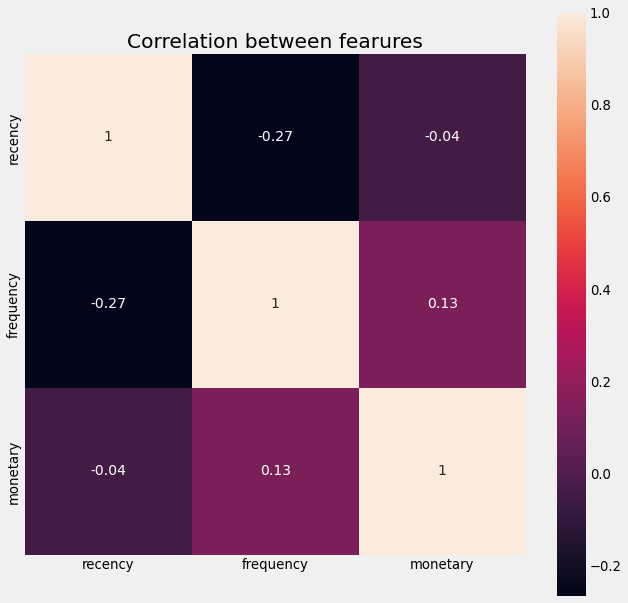

In [70]:
correlation = rfm_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.title('Correlation between fearures')

In [71]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,50.0,1.0,125.31
0.50,122.0,2.0,343.73
0.75,242.0,5.0,1134.69


In [72]:
quantiles.to_dict()

{'recency': {0.25: 50.0, 0.5: 122.0, 0.75: 242.0},
 'frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'monetary': {0.25: 125.31, 0.5: 343.73, 0.75: 1134.69}}

In [73]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [74]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['recency_quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation['frequency_quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['monetary_quartile'] = rfm_segmentation['monetary'].apply(FMScore, args=('monetary',quantiles,))

rfm_segmentation.head()

,recency,frequency,monetary,recency_quartile,frequency_quartile,monetary_quartile
customer_id,,,,,,
10000000,23,1,200.00,4,1,2
10000001,184,7,416.37,2,4,3
10000021,5,5,395.45,4,3,3
10000038,328,2,89.80,1,2,1
10000043,63,4,119.64,3,3,1


In [75]:
#RFM Score

rfm_segmentation['RFM_score'] = rfm_segmentation.recency_quartile.map(str) \
                            + rfm_segmentation.frequency_quartile.map(str) \
                            + rfm_segmentation.monetary_quartile.map(str)
rfm_segmentation.head()

,recency,frequency,monetary,recency_quartile,frequency_quartile,monetary_quartile,RFM_score
customer_id,,,,,,,
10000000,23,1,200.00,4,1,2,412
10000001,184,7,416.37,2,4,3,243
10000021,5,5,395.45,4,3,3,433
10000038,328,2,89.80,1,2,1,121
10000043,63,4,119.64,3,3,1,331


In [76]:
#Which customers are at the verge of churning?

#Customers who's recency value is low

rfm_segmentation[rfm_segmentation['recency_quartile'] < 2 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,recency_quartile,frequency_quartile,monetary_quartile,RFM_score
customer_id,,,,,,,
24932499,293,3,4026279.16,1,3,4,134
22901251,345,4,3339466.70,1,3,4,134
2036361,335,3,799676.50,1,3,4,134
10516751,261,4,792787.68,1,3,4,134
7800019,314,8,729242.00,1,4,4,144


In [77]:
#Customers who's recency, frequency as well as monetary values are low 

rfm_segmentation[rfm_segmentation['RFM_score'] == '111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,recency_quartile,frequency_quartile,monetary_quartile,RFM_score
customer_id,,,,,,,
4373642,365,1,89.99,1,1,1,111
6233584,365,1,19.80,1,1,1,111
4805716,365,1,86.90,1,1,1,111
4806138,365,1,68.90,1,1,1,111
23553485,365,1,34.20,1,1,1,111


In [78]:
#Customers with high frequency value

rfm_segmentation[rfm_segmentation['frequency_quartile'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,recency_quartile,frequency_quartile,monetary_quartile,RFM_score
customer_id,,,,,,,
2159128,30,55,33884465.85,4,4,4,444
6406658,8,47,15388680.41,4,4,4,444
3732371,126,5,11800915.55,2,3,4,234
5437727,9,124,11287677.80,4,4,4,444
5413927,2,56,8702577.07,4,4,4,444


In [79]:
# We will use the Recency and Frequency scores for customer segmentation. 
# We assume that a customer who has made a recent and frequent purchase should have a high RFM score.
# For this reason, we create a column named RFM_segment.

rfm_segmentation['RFM_segment'] = (rfm_segmentation['recency_quartile'].astype(str)+ rfm_segmentation['frequency_quartile'].astype(str))

In [80]:
seg_map = {
    r'11': 'Hibernating',
    r'1[2-3]': 'At Risk',
    r'14': 'Can\'t Loose',
    r'21': 'About to Sleep',
    r'22': 'Need Attention',
    r'[2-3][3-4]': 'Loyal Customers',
    r'31': 'Promising',
    r'41': 'New Customers',
    r'[3-4]2': 'Potential Loyalists',
    r'4[3-4]': 'Champions'
}

rfm_segmentation['RFM_segment'] = rfm_segmentation['RFM_segment'].replace(seg_map, regex=True)
rfm_segmentation.head(5)

,recency,frequency,monetary,recency_quartile,frequency_quartile,monetary_quartile,RFM_score,RFM_segment
customer_id,,,,,,,,
10000000,23,1,200.00,4,1,2,412,New Customers
10000001,184,7,416.37,2,4,3,243,Loyal Customers
10000021,5,5,395.45,4,3,3,433,Champions
10000038,328,2,89.80,1,2,1,121,At Risk
10000043,63,4,119.64,3,3,1,331,Loyal Customers


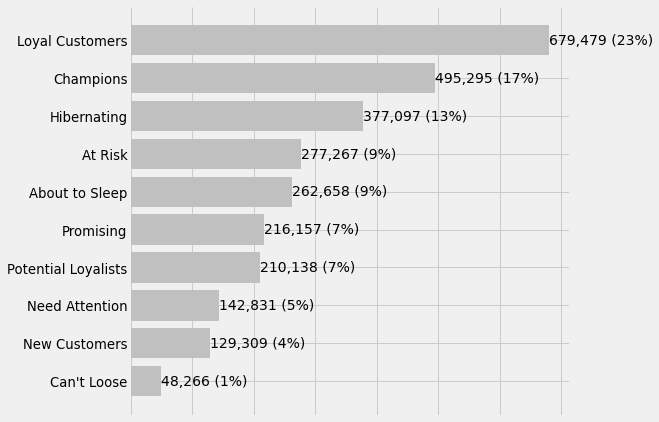

In [81]:
segments_counts = rfm_segmentation['RFM_segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Can\'t loose']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [82]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm_df.groupby('RFM_segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                    recency frequency monetary        
                       mean      mean     mean   count
RFM_segment                                           
About to Sleep        189.9       1.0    475.9  262658
At Risk               297.4       2.8    762.9  277267
Can't Loose           288.3       9.7   1842.3   48266
Champions              22.5      14.9   5749.1  495295
Hibernating           306.1       1.0    388.5  377097
Loyal Customers       127.9       7.8   2367.7  679479
Need Attention        188.4       2.0    724.4  142831
New Customers          25.7       1.0    781.0  129309
Potential Loyalists    58.8       2.0    992.3  210138
Promising              82.3       1.0    544.3  216157


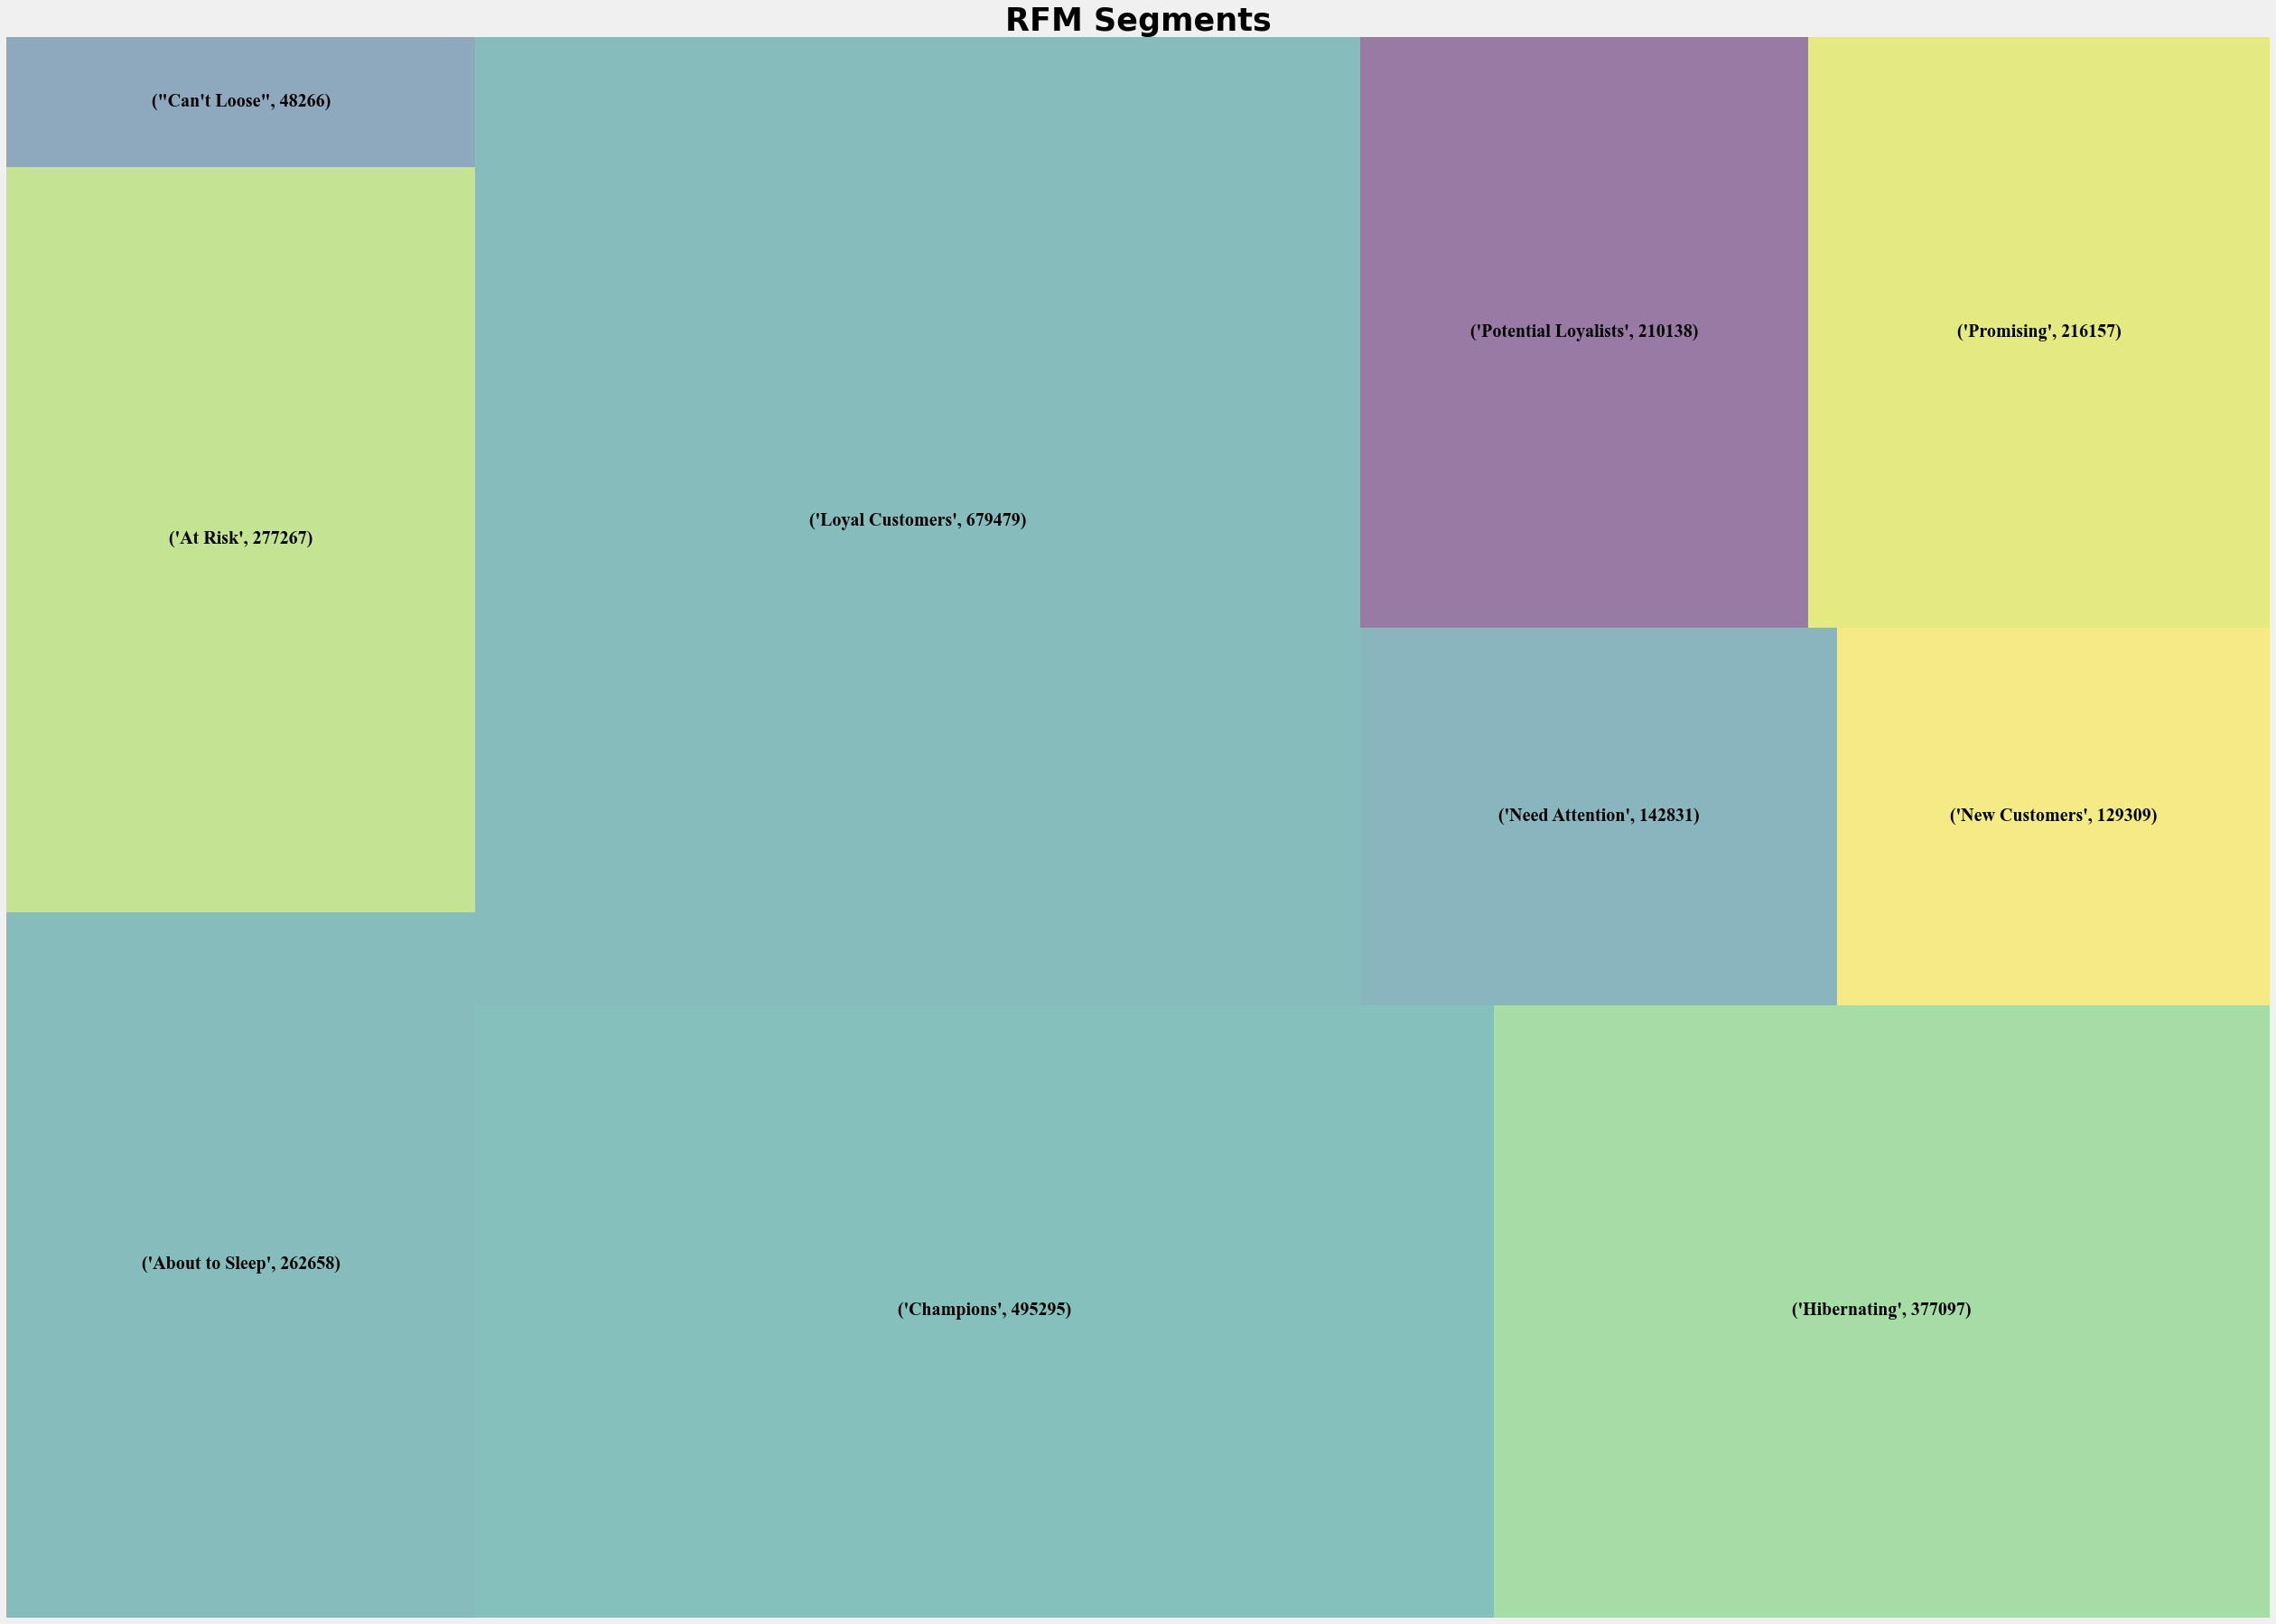

In [83]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

#Create our plot and resize it.

origin_counts = rfm_df.groupby('RFM_segment').size().reset_index(name='counts')
labels= list(zip(origin_counts.RFM_segment, origin_counts.counts))

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(40, 30)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=labels, alpha=.51,
              text_kwargs={'fontsize':20, 'fontname':"Times New Roman",'weight':'bold'})
plt.title("RFM Segments",fontsize=35,fontweight="bold")
plt.axis('off')
plt.show()